In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values after this date
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

ModuleNotFoundError: No module named 'backtrader'

Starting Portfolio Value: 1000.00
2000-02-18, Close, 26.05
2000-02-22, Close, 26.38
2000-02-22, BUY CREATE, 26.38
2000-02-23, BUY EXECUTED, Price: 26.77, Cost: 267.70, Comm 0.00
2000-02-23, Close, 28.05
2000-02-24, Close, 27.55
2000-02-25, Close, 31.41
2000-02-28, Close, 30.52
2000-02-29, Close, 33.02
2000-03-01, Close, 31.80
2000-03-02, Close, 30.47
2000-03-03, Close, 33.36
2000-03-06, Close, 33.69
2000-03-07, Close, 33.33
2000-03-08, Close, 36.97
2000-03-09, Close, 37.36
2000-03-10, Close, 36.30
2000-03-13, Close, 35.02
2000-03-14, Close, 34.25
2000-03-15, Close, 34.97
2000-03-16, Close, 36.44
2000-03-17, Close, 35.50
2000-03-20, Close, 34.75
2000-03-21, Close, 35.89
2000-03-22, Close, 37.39
2000-03-23, Close, 38.64
2000-03-24, Close, 38.69
2000-03-27, Close, 39.33
2000-03-28, Close, 38.50
2000-03-29, Close, 36.69
2000-03-30, Close, 34.88
2000-03-30, SELL CREATE, 34.88
2000-03-31, SELL EXECUTED, Price: 35.66, Cost: 267.70, Comm 0.00
2000-03-31, OPERATION PROFIT, GROSS 88.90, NET 88.9

2000-11-21, SELL EXECUTED, Price: 22.07, Cost: 216.30, Comm 0.00
2000-11-21, OPERATION PROFIT, GROSS 4.40, NET 4.40
2000-11-21, Close, 21.24
2000-11-22, Close, 19.85
2000-11-24, Close, 21.46
2000-11-27, Close, 20.57
2000-11-28, Close, 20.15
2000-11-29, Close, 20.35
2000-11-30, Close, 23.57
2000-11-30, BUY CREATE, 23.57
2000-12-01, BUY EXECUTED, Price: 23.46, Cost: 234.60, Comm 0.00
2000-12-01, Close, 23.52
2000-12-04, Close, 25.07
2000-12-05, Close, 28.02
2000-12-06, Close, 26.85
2000-12-07, Close, 25.18
2000-12-08, Close, 26.74
2000-12-11, Close, 28.41
2000-12-12, Close, 27.35
2000-12-13, Close, 25.24
2000-12-14, Close, 24.46
2000-12-14, SELL CREATE, 24.46
2000-12-15, SELL EXECUTED, Price: 26.18, Cost: 234.60, Comm 0.00
2000-12-15, OPERATION PROFIT, GROSS 27.20, NET 27.20
2000-12-15, Close, 25.41
2000-12-15, BUY CREATE, 25.41
2000-12-18, BUY EXECUTED, Price: 26.68, Cost: 266.80, Comm 0.00
2000-12-18, Close, 28.46
2000-12-19, Close, 27.24
2000-12-20, Close, 25.35
2000-12-20, SELL CREAT

<IPython.core.display.Javascript object>


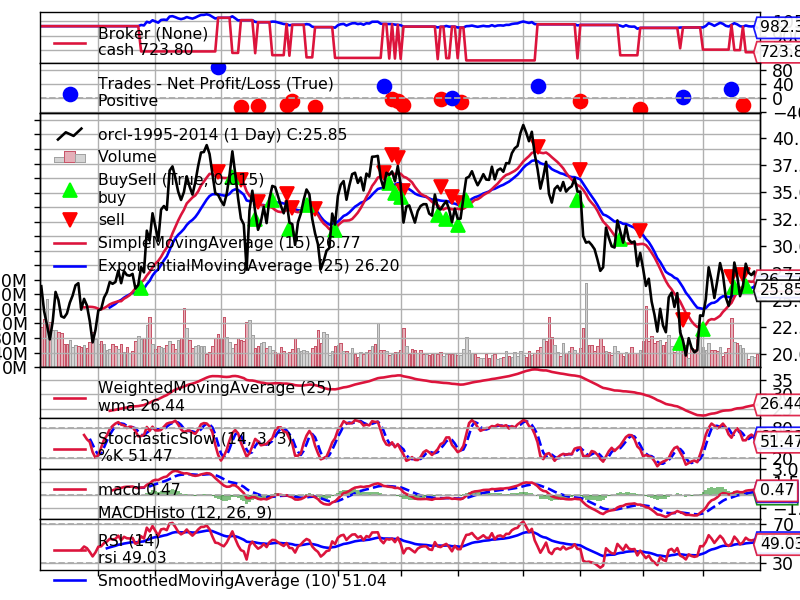

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

#%matplotlib inline
#%matplotlib widget
%matplotlib notebook

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

        # Indicators for the plotting show
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
                                            subplot=True)
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        bt.indicators.ATR(self.datas[0], plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    cerebro.plot()

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])


# Import the backtrader platform
import backtrader as bt


# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
        ('printlog', False),
    )

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.maperiod, self.broker.getvalue()), doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    strats = cerebro.optstrategy(
        TestStrategy,
        maperiod=range(10, 31))

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Run over everything
    cerebro.run(maxcpus=1)

2000-12-29, (MA Period 10) Ending Value 877.50
2000-12-29, (MA Period 11) Ending Value 878.70
2000-12-29, (MA Period 12) Ending Value 839.80
2000-12-29, (MA Period 13) Ending Value 899.90
2000-12-29, (MA Period 14) Ending Value 902.50
2000-12-29, (MA Period 15) Ending Value 975.60
2000-12-29, (MA Period 16) Ending Value 961.90
2000-12-29, (MA Period 17) Ending Value 952.60
2000-12-29, (MA Period 18) Ending Value 1011.00
2000-12-29, (MA Period 19) Ending Value 1039.40
2000-12-29, (MA Period 20) Ending Value 1073.20
2000-12-29, (MA Period 21) Ending Value 1055.10
2000-12-29, (MA Period 22) Ending Value 1057.60
2000-12-29, (MA Period 23) Ending Value 1021.50
2000-12-29, (MA Period 24) Ending Value 1018.80
2000-12-29, (MA Period 25) Ending Value 1012.40
2000-12-29, (MA Period 26) Ending Value 998.30
2000-12-29, (MA Period 27) Ending Value 983.10
2000-12-29, (MA Period 28) Ending Value 976.90
2000-12-29, (MA Period 29) Ending Value 984.20
2000-12-29, (MA Period 30) Ending Value 980.80


In [1]:
import backtrader as bt
from datetime import datetime

class firstStrategy(bt.Strategy):
    params = (
        ('period',21),
        )

    def __init__(self):
        self.startcash = self.broker.getvalue()
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=self.params.period)

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)

    def stop(self):
        pnl = round(self.broker.getvalue() - self.startcash,2)
        print('RSI Period: {} Final PnL: {}'.format(
            self.params.period, pnl))

if __name__ == '__main__':
    #Variable for our starting cash
    startcash = 10000

    #Create an instance of cerebro
    cerebro = bt.Cerebro()

    #Add our strategy
    cerebro.optstrategy(firstStrategy, period=range(14,21))

    #Get Apple data from Yahoo Finance.
    data = bt.feeds.YahooFinanceData(
        dataname='AAPL',
        fromdate = datetime(2016,1,1),
        todate = datetime(2017,1,1),
        buffered= True
        )

    #Add the data to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(startcash)

    # Run over everything
    strats = cerebro.run()

RSI Period: 14 Final PnL: 2221.0
RSI Period: 15 Final PnL: 2086.0
RSI Period: 17 Final PnL: 2090.0
RSI Period: 16 Final PnL: 1836.0
RSI Period: 20 Final PnL: 1843.0
RSI Period: 18 Final PnL: 1959.0
RSI Period: 19 Final PnL: 1431.0


Results: Ordered by period:
Period: 14, PnL: 2221.0
Period: 15, PnL: 2086.0
Period: 16, PnL: 1836.0
Period: 17, PnL: 2090.0
Period: 18, PnL: 1959.0
Period: 19, PnL: 1431.0
Period: 20, PnL: 1843.0
Results: Ordered by Profit:
Period: 14, PnL: 2221.0
Period: 17, PnL: 2090.0
Period: 15, PnL: 2086.0
Period: 18, PnL: 1959.0
Period: 20, PnL: 1843.0
Period: 16, PnL: 1836.0
Period: 19, PnL: 1431.0


<IPython.core.display.Javascript object>


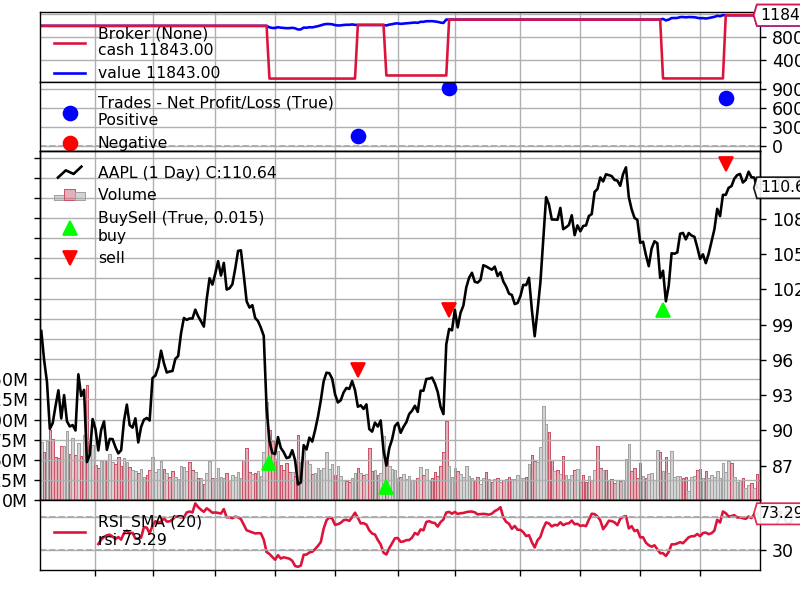

In [2]:
%matplotlib notebook

import backtrader as bt
from datetime import datetime

class firstStrategy(bt.Strategy):
    params = (
        ('period',21),
        )

    def __init__(self):
        self.startcash = self.broker.getvalue()
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=self.params.period)

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.buy(size=100)
        else:
            if self.rsi > 70:
                self.sell(size=100)

if __name__ == '__main__':
    #Variable for our starting cash
    startcash = 10000

    #Create an instance of cerebro
    cerebro = bt.Cerebro(optreturn=False)

    #Add our strategy
    cerebro.optstrategy(firstStrategy, period=range(14,21))

    #Get Apple data from Yahoo Finance.
    data = bt.feeds.YahooFinanceData(
        dataname='AAPL',
        fromdate = datetime(2016,1,1),
        todate = datetime(2017,1,1),
        buffered= True
        )


    #Add the data to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(startcash)

    # Run over everything
    opt_runs = cerebro.run()

    # Generate results list
    final_results_list = []
    for run in opt_runs:
        for strategy in run:
            value = round(strategy.broker.get_value(),2)
            PnL = round(value - startcash,2)
            period = strategy.params.period
            final_results_list.append([period,PnL])

    #Sort Results List
    by_period = sorted(final_results_list, key=lambda x: x[0])
    by_PnL = sorted(final_results_list, key=lambda x: x[1], reverse=True)

    #Print results
    print('Results: Ordered by period:')
    for result in by_period:
        print('Period: {}, PnL: {}'.format(result[0], result[1]))
    print('Results: Ordered by Profit:')
    for result in by_PnL:
        print('Period: {}, PnL: {}'.format(result[0], result[1]))
        
    cerebro.plot()

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
#from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc

def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

#pandas_candlestick_ohlc(apple)

IndexError: index -1 is out of bounds for axis 0 with size 0

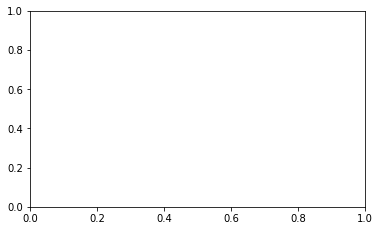

In [11]:
import pandas as pd
#import pandas.io.data as web   # Package and modules for importing data; this code may change depending on pandas version
#from pandas_datareader import data
import pandas_datareader as web
import datetime

start = datetime.datetime(2019,1,1)
#end = datetime.date.today()
end = datetime.datetime(2019,1,2)
apple = web.DataReader("AAPL", "yahoo", start, end)
apple["20d"] = np.round(apple["Close"].rolling(window = 20, center = False).mean(), 2)
 
pandas_candlestick_ohlc(apple.loc['2016-01-04':'2016-08-07',:], otherseries = "20d")

In [2]:
%tb

SystemExit: 2